# **Boston_Housing - Regression Analysis**

## **Import TensorFlow**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

- import TensorFlow

In [ ]:
import tensorflow as tf

tf.__version__

'2.5.0'

- GPU 설정 Off

In [ ]:
tf.test.gpu_device_name()

''

# **I. Boston_Housing Data_Set Load & Review**

> ## **1) Load Boston_Housing Data_Set**

In [ ]:
from tensorflow.keras.datasets import boston_housing

(train_data, train_targets), (X_test, y_test) = boston_housing.load_data()

> ## **2) Data_Set Information**

In [ ]:
print(train_data.shape)
print(X_test.shape)

print(train_targets[:10])
print(y_test[:10])

(404, 13)
(102, 13)
[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4]
[ 7.2 18.8 19.  27.  22.2 24.5 31.2 22.9 20.5 23.2]


# **II. Data Preprocessing**

> ## **1) Standardization**

- train_data & test_data

In [ ]:
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)

train_data = train_data - mean
train_data = train_data / std

X_test = X_test - mean
X_test = X_test / std

> ## **2) Train & Validation Split**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(train_data, train_targets,
                                                     test_size=0.2,
                                                     random_state=2045)

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((323, 13), (81, 13), (323,), (81,))

# **III. Boston_Housing Keras Modeling**

> ## **1) Model Define**

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

boston = models.Sequential(name='Regression')
boston.add(layers.Dense(64, activation='relu', input_shape=(13, )))
boston.add(layers.Dense(64, activation='relu'))
boston.add(layers.Dense(1))   # 회귀는 마지막에 Avtivation Function을 적용하면 안 됨!

In [ ]:
boston.summary()

Model: "Regression"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


> ## **2) Model Compile**

In [ ]:
boston.compile(loss='mse',            # 학습은 MSE로 시키지만,
               optimizer='rmsprop',
               metrics=['mae'])       # 사람이 볼 때 실제 에러는 MAE가 더 가까울 것

> ## **3) Model Fit**

- 약 4분

In [ ]:
%%time

Hist_boston = boston.fit(X_train, y_train,
                         epochs=500,
                         batch_size=1,
                         validation_data=(X_valid, y_valid))

Epoch 1/500
323/323 [==============================] - 1s 2ms/step - loss: 204.8521 - mae: 10.4985 - val_loss: 45.9910 - val_mae: 4.2695
Epoch 2/500
323/323 [==============================] - 0s 1ms/step - loss: 27.6337 - mae: 3.6762 - val_loss: 25.9063 - val_mae: 3.1609
Epoch 3/500
323/323 [==============================] - 0s 1ms/step - loss: 20.3357 - mae: 3.1310 - val_loss: 19.5860 - val_mae: 2.8419
Epoch 4/500
323/323 [==============================] - 0s 1ms/step - loss: 16.4489 - mae: 2.7955 - val_loss: 16.0609 - val_mae: 2.4448
Epoch 5/500
323/323 [==============================] - 0s 1ms/step - loss: 14.3637 - mae: 2.6509 - val_loss: 13.8187 - val_mae: 2.5353
Epoch 6/500
323/323 [==============================] - 0s 1ms/step - loss: 13.0359 - mae: 2.5188 - val_loss: 14.9886 - val_mae: 2.4287
Epoch 7/500
323/323 [==============================] - 0s 1ms/step - loss: 12.6752 - mae: 2.3782 - val_loss: 13.4943 - val_mae: 2.3183
Epoch 8/500
323/323 [==============================] 

> ## **4) Model Evaluate**

In [ ]:
test_mse_score, test_mae_score = boston.evaluate(X_test, y_test)

print('MAE :', test_mae_score)

4/4 [==============================] - 0s 4ms/step - loss: 13.5757 - mae: 2.4655
MAE : 2.465481996536255


> ## **5) Visualization**

- 전체 시각화

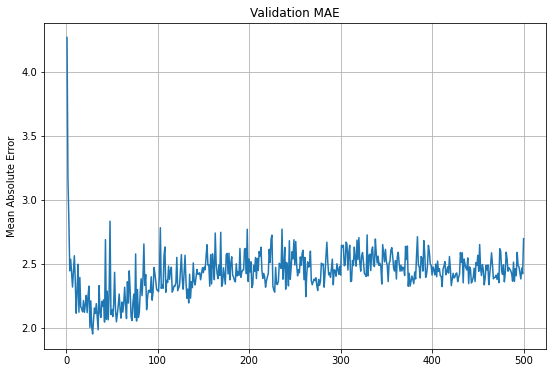

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_boston.history['val_mae']) + 1)

plt.figure(figsize=(9, 6))
plt.plot(epochs, Hist_boston.history['val_mae'])
plt.title('Validation MAE')
plt.ylabel('Mean Absolute Error')
plt.grid()
plt.show()

- 5번째 이후 MAE 확인

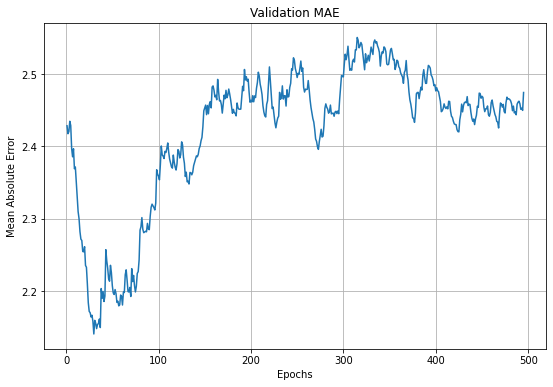

In [ ]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

mae_history = Hist_boston.history['val_mae']

mae_history = smooth_curve(mae_history[5:])

plt.figure(figsize=(9, 6))
plt.plot(range(1, len(mae_history) + 1), mae_history)
plt.title('Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.grid()
plt.show()

> ## **6) Keras Session Clear**

In [ ]:
from tensorflow.keras import backend as K

K.clear_session()

# **IV. Early Stopping**

> ## **1) Model Define & Compile**

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

boston = models.Sequential(name='EarlyStopping')
boston.add(layers.Dense(64, activation='relu', input_shape=(13, )))
boston.add(layers.Dense(64, activation='relu'))
boston.add(layers.Dense(1))

boston.compile(loss='mse',
               optimizer='rmsprop',
               metrics=['mae'])

> ## **2) EarlyStopping()**

- monitor :모니터링 대상 성능
- mode : 모니터링 대상을 최소화(min) 또는 최대화(max)
- patience : 성능이 개선되지 않는 epoch 횟수

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_mae',
                   mode='min',
                   patience=50,
                   verbose=1)

> ## **3) ModelCheckpoint()**

- 'best_boston.h5' : 최적 모델이 저장될 경로
- save_best_only : 최적 모델만 저장할지 지정

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

mc = ModelCheckpoint('best_boston.h5',
                     monitor='val_mae',
                     mode='min',
                     save_best_only=True,
                     verbose=1)

> ## **4) Model Fit with callbacks**

- callbacks : EarlyStoppint()과 ModelCheckpoint() 객체 지정

In [ ]:
%%time

Hist_boston = boston.fit(X_train, y_train,
                         epochs=500,
                         batch_size=1,
                         validation_data=(X_valid, y_valid),
                         callbacks=[es, mc],
                         verbose=1)

Epoch 1/500
323/323 [==============================] - 1s 2ms/step - loss: 213.8914 - mae: 10.9358 - val_loss: 60.1109 - val_mae: 4.5977

Epoch 00001: val_mae improved from inf to 4.59774, saving model to best_boston.h5
Epoch 2/500
323/323 [==============================] - 0s 1ms/step - loss: 27.8184 - mae: 3.6050 - val_loss: 30.9056 - val_mae: 2.8409

Epoch 00002: val_mae improved from 4.59774 to 2.84090, saving model to best_boston.h5
Epoch 3/500
323/323 [==============================] - 0s 1ms/step - loss: 18.4838 - mae: 2.8781 - val_loss: 25.2394 - val_mae: 3.1222

Epoch 00003: val_mae did not improve from 2.84090
Epoch 4/500
323/323 [==============================] - 0s 1ms/step - loss: 15.4153 - mae: 2.6784 - val_loss: 22.3498 - val_mae: 2.6576

Epoch 00004: val_mae improved from 2.84090 to 2.65757, saving model to best_boston.h5
Epoch 5/500
323/323 [==============================] - 0s 1ms/step - loss: 13.6240 - mae: 2.4792 - val_loss: 21.1558 - val_mae: 2.7737

Epoch 00005: v

> ## **5) Best Model**

In [ ]:
!ls -l

total 76
-rw-r--r-- 1 root root 70280 Aug  6 01:02 best_boston.h5
drwxr-xr-x 1 root root  4096 Jul 16 13:20 sample_data


> ## **6) Model Evaluate**

In [ ]:
test_mse_score, test_mae_score = boston.evaluate(X_test, y_test)

print('MAE :', test_mae_score)

4/4 [==============================] - 0s 3ms/step - loss: 21.5379 - mae: 2.6936
MAE : 2.6935875415802
